<a href="https://colab.research.google.com/github/TanuRajput110/Airbnb-EDA-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Founded in August of 2008 and based in San Francisco, California, **Airbnb** is an online marketplace that connects people who want to rent out their homes with people looking for accomodations in that local.  It currently covers more than 100,000 cities and 220 countries worldwide. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.


##> ***NYC*** is the most populous city in the US, and one of the most popular tourism and business places globally!.

## **Firstly, we will mount the drive and download the dataset.**

In [1]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Now, Let's begin our data analysis by loading the Python packages/libraries.

In [2]:
# Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Defining the path in which the dataset is present. To do so, we have to use pd.read_csv() function which imports the CSV file into DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##Getting/Viewing the information of the dataset. 

In [4]:
# We can get the information of dataset by using "df.info()" function. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

####--> We get to see the different types of data variables, its datatypes present in the data set. We can also get the overview of null values roughly.

#### --> Also it shows the size of the dataset we are working with. There are **16 columns**(mix of categorical and numeric data) and **48895 rows**.####--> We get to see the different types of data variables, its datatypes present in the data set. We can also get the overview of null values roughly.

#### --> Also it shows the size of the dataset we are working with. There are **16 columns**(mix of categorical and numeric data) and **48895 rows**.

# Using **.describe()** function to see some statistical information of the data

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000




```
# This is formatted as code
```

# **Cleaning the Data**

## In .info() cell we can see the nullvalues, but we want the exact number of null values present in each column. 
## So, ".isnull().sum()" function will show us the total number of nulls(NaN) in each column of dataset.

In [6]:
#looking forward to find out first that which columns have null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here we can see that,we have 2 columns which have more than 10000 null values.
Having so many null values is not appropriate for  exploring data or to analyse of any form. So, we have to clean the data. We observe that null values are present in irrelevant columns so we directly clean the data by dropping certain columns that is not needed for analysis i.e. 'name' ,'Host_name', 'last_reviews','latitude','longitude'....

# Dropping the irrelevant columns.

In [7]:
#drop unwanted columns...
df.drop(['host_name','name','latitude','longitude','last_review'], axis = 1,inplace = True)
df

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


### Replacing all null values in "reviews_per_month" column with zero



In [8]:
# replacing all null values in review_per_month with 0
df.fillna({'reviews_per_month':0,}, inplace=True)

# Verifying the changes
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detecting **Outliers** in the numerical dataset.

In [9]:
# lets observe normally the outliers or extreme values in statistical description
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Here, all columns except "id" and "host id" have a big difference between 

*   List item
*   List item

the third quartile value and the max value. 

##  checking outliers of numerical columns using seaborn boxplot
columns = [ 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

# ###--> We can clearly tell that,columns, viz., price, minimum_nights, calculated_host_listings_count has outliers or extreme values.

###--> And, for availability_365 there is no single outlier in the column.

# **Handling Data..**
##We can handle the data by removing outliers or setting proper limit!.

## (a) Removing outliers for "Price" column
For removing Outliers ,we are using Quantile method which is effective!

In [10]:
high_limit = df['price'].quantile(0.99986)
print(high_limit)
low_limit = df['price'].quantile(0.0015)
print(low_limit)
new_df = df[(df['price'] < high_limit) & (df['price'] > low_limit)]
new_df


8077.419999997801
20.0


,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



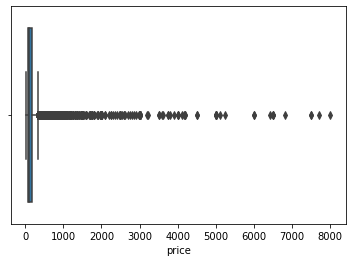

In [11]:
sns.boxplot(new_df['price'])
plt.show()

## (b) Removing Outliers for "minimum_nights" column

For removing Outliers ,we are using Quantile method which is effective!

In [12]:
high_min_limit = new_df['minimum_nights'].quantile(0.9999)
print(high_min_limit)
low_min_limit = new_df['minimum_nights'].quantile(0.0)
print(low_min_limit)
new_df1 = new_df[new_df['minimum_nights'] < high_min_limit] 
new_df1

559.8799999976764
1.0


,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



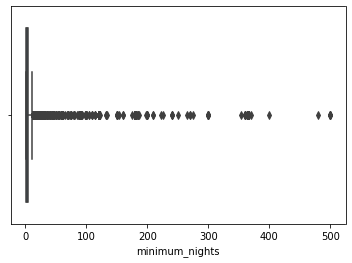

In [13]:
sns.boxplot(new_df1['minimum_nights'])
plt.show()

##After  **cleaning data** we have **48796 rows and 11 columns**

1.   List item
2.   List item



In [14]:
new_df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.879600e+04,4.879600e+04,48796.000000,48796.000000,48796.000000,48796.00000,48796.000000,48796.000000
mean,1.901030e+07,6.759004e+07,151.583962,6.914358,23.292299,1.09126,7.153414,112.770514
std,1.098481e+07,7.860692e+07,210.721457,17.518470,44.575849,1.59697,32.985052,131.614779
min,2.539000e+03,2.438000e+03,21.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,9.464114e+06,7.812758e+06,69.000000,1.000000,1.000000,0.04000,1.000000,0.000000
50%,1.967108e+07,3.073912e+07,107.000000,3.000000,5.000000,0.37000,1.000000,45.000000
75%,2.914930e+07,1.074344e+08,175.000000,5.000000,24.000000,1.58000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,8000.000000,500.000000,629.000000,58.50000,327.000000,365.000000


# Now, lets **explore**, **analyze** and **vizualize** the **cleaned** **dataset** and  get some insights out of it... 

In [15]:
# First, Let us see the first five rows of the "CLEANED DATASET" using '.head()' function    
head = new_df1.head()
head

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [16]:
# For seeing the last five rows of the cleaned data, we use ".tail()" function
tail = new_df1.tail()
tail

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.0,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.0,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.0,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.0,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,Private room,90,7,0,0.0,1,23


In [17]:
# statistical information.
new_df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.879600e+04,4.879600e+04,48796.000000,48796.000000,48796.000000,48796.00000,48796.000000,48796.000000
mean,1.901030e+07,6.759004e+07,151.583962,6.914358,23.292299,1.09126,7.153414,112.770514
std,1.098481e+07,7.860692e+07,210.721457,17.518470,44.575849,1.59697,32.985052,131.614779
min,2.539000e+03,2.438000e+03,21.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,9.464114e+06,7.812758e+06,69.000000,1.000000,1.000000,0.04000,1.000000,0.000000
50%,1.967108e+07,3.073912e+07,107.000000,3.000000,5.000000,0.37000,1.000000,45.000000
75%,2.914930e+07,1.074344e+08,175.000000,5.000000,24.000000,1.58000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,8000.000000,500.000000,629.000000,58.50000,327.000000,365.000000


## Lets find out the uniqueness of categorical columns....

### (i) Unique values of neighbourhood_group

In [18]:
print(df.neighbourhood_group.unique())
len(df.neighbourhood_group.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


5

###(ii) Unique values of "neighbourhood"

In [19]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [20]:
len(df.neighbourhood.unique())

221

### (iii) Unique values of "room_type" 

In [21]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#**1) Number of Airbnb listings in different neighbourhood_group**

In [22]:
neigh_listings_counting = new_df1.neighbourhood_group.value_counts()
count_of_neighbourhood_group = pd.DataFrame(neigh_listings_counting)
count_of_neighbourhood_group.reset_index(inplace=True)
count_of_neighbourhood_group.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'Listings_Count'}, inplace=True)
print(count_of_neighbourhood_group)

  neighbourhood_group  Listings_Count
0           Manhattan           21633
1            Brooklyn           20059
2              Queens            5651
3               Bronx            1083
4       Staten Island             370


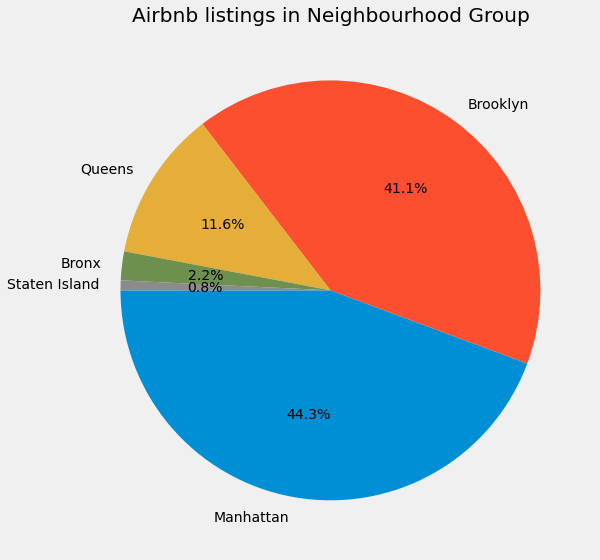

In [23]:
# Visualization of different neighbourhood group by count
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,9))
plt.title("Airbnb listings in Neighbourhood Group")
g = plt.pie(new_df1.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

## --> We can see  that 'Manhattan' has most number of Airbnb listings/housings.
## --> And "Staten island" has least number of Airbnb listings. 

#**2)** **Average Price of Airbnb listings in different neighbourhood_group**


In [24]:
avgprice_neigh_group = new_df1.groupby(["neighbourhood_group"])['price'].aggregate(np.mean).reset_index().sort_values('price')
print(avgprice_neigh_group)

  neighbourhood_group       price
0               Bronx   88.023084
3              Queens   97.974518
4       Staten Island  115.600000
1            Brooklyn  124.130764
2           Manhattan  194.841076


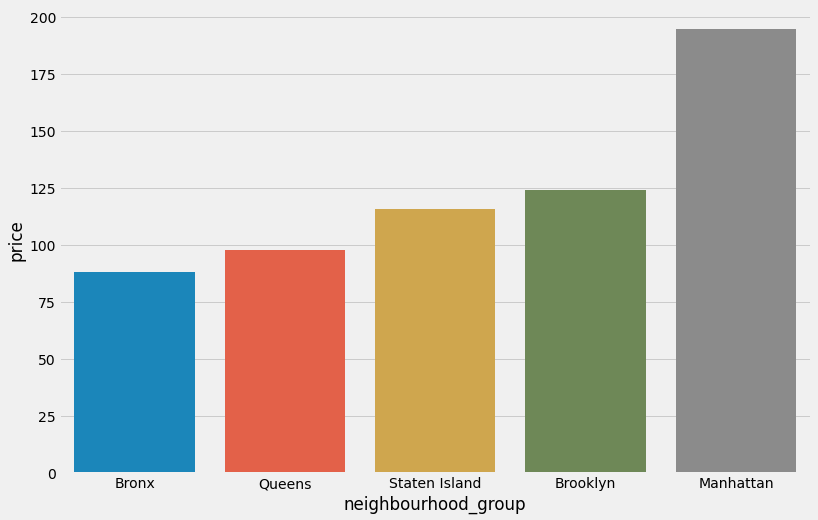

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='neighbourhood_group', y = 'price', data = avgprice_neigh_group)
plt.show()

## As we can see from the table and barplot,
###--> Manhattan receives highest average price of $194.8 because of its highly demand. Its clearly shows that the highly rated neighbourhood_group(location) is to be costly maybe its constant supply, higher the demand, higher the price is!. Manhattan has the most expensive rentals compared to the other neighbourhood_group


### --> Bronx receives lowest average price of $88.0


## We saw average price of listings in neighbourhood_group
# Now we will see the average price of listings for "neighbourhood"

In [26]:
avgprice_of_neigh =new_df1.groupby(["neighbourhood"])['price'].aggregate(np.mean).reset_index().sort_values('price')
avgprice_of_neigh 

,neighbourhood,price
27,Bull's Head,47.333333
102,Hunts Point,50.500000
196,Tremont,51.545455
179,Soundview,53.466667
141,New Dorp,57.000000
...,...,...
167,Riverdale,442.090909
197,Tribeca,445.130682
174,Sea Gate,487.857143
219,Woodrow,700.000000


## --> **Fort Wadsworth** have highest average price for listings which is $800


## --> **Bull's Head** have cheapest price,i.e, $47

# **3)** **Lets see which neighbourhood_group contains the listings with most reviewed**

In [27]:
#Lets check out which neighbourhood group contains the listings with most reviewed.!
most_reviewed_property = new_df1.groupby(['id','neighbourhood_group'])['number_of_reviews'].mean().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True)
most_reviewed_property

,id,neighbourhood_group,number_of_reviews
0,9145202,Queens,629
1,903972,Manhattan,607
2,903947,Manhattan,597
3,891117,Manhattan,594
4,10101135,Queens,576
...,...,...,...
48791,31797655,Manhattan,0
48792,2224896,Manhattan,0
48793,9794251,Manhattan,0
48794,2222428,Manhattan,0


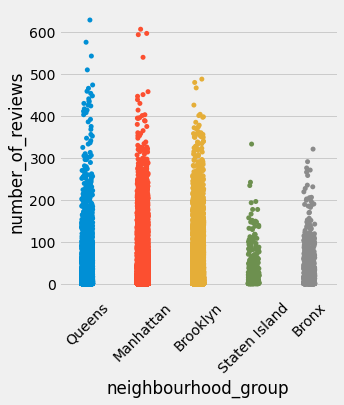

In [28]:
i=sns.catplot(x='neighbourhood_group',y = 'number_of_reviews', data = most_reviewed_property)
i.set_xticklabels( rotation=45)
plt.show()

##--> As we can see, Queens has the listings with most and high number of reviews followed by Manhattan.
##-->Bronx has the listings with less number of reviews.

# **4) Which Host has the highest number of Airbnb listings?**

In [29]:
# Let's check the hosts who have more number of Airbnb listings
top10_host=new_df1.host_id.value_counts().head(10)
top10_host_df=pd.DataFrame(top10_host)
top10_host_df.reset_index(inplace=True)
top10_host_df.rename(columns={'index':'host_id', 'host_id':'Count'}, inplace=True)
top10_host_df

,host_id,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


[Text(0, 0, '1475015'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

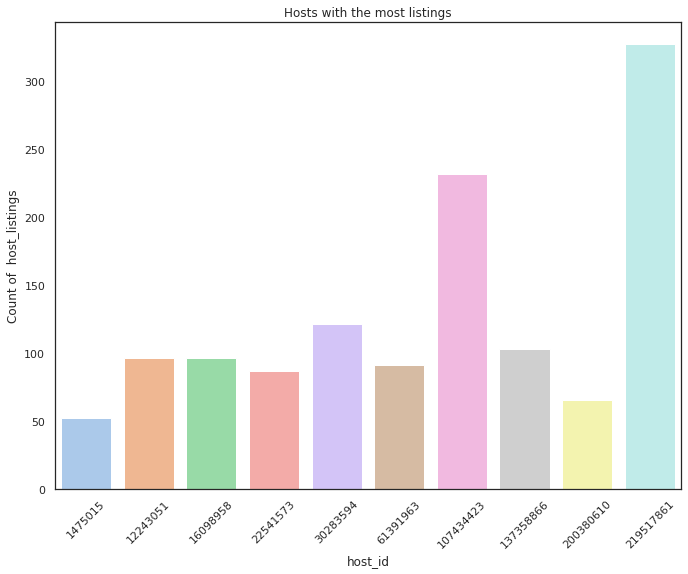

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
d_1=sns.barplot(x="host_id", y="Count", data=top10_host_df,palette='pastel')
d_1.set_title('Hosts with the most listings')
d_1.set_ylabel('Count of  host_listings')
d_1.set_xlabel('host_id')
d_1.set_xticklabels(d_1.get_xticklabels(), rotation=45)

###-->  We can see that there is a good distribution between top 10 hosts with the most listings. 


# **Now**, Just out of curiousity!!!

In [31]:
# I want to find out that how much the average money(/ or total sum amt from his all listings) do the top host,i.e, host_id =219517861 earns? 
x = new_df1.loc[new_df1['host_id']==219517861]
avg_money  = x['price'].mean()  # average money he earns!
print(avg_money)

253.19571865443424


In [32]:
sum_amt = x['price'].sum()  # total sum amount  from all his listings "if" all his listings were booked for 1 night
print(sum_amt)  #--------(1)

82795


In [33]:
#Now, we will do some MATH to calculate how much money did he get after deducting the 3% airbnb commission per listing booked! 
commission = sum_amt*0.03
print(commission) #---------(2)

2483.85


In [34]:
actual_amt = sum_amt - commission   #Subtracting (1) with (2).
print(actual_amt)

80311.15


###-->The host with host_id number = 219517861 who has 327 listings, the average money he earns with all his listings is $253.19

###--> means he earns approx. total $82795 per 1 minimum_night if all his listings were booked! 

###--> And after deducting airbnb's commission, he get the actual amount which is $80311.15

# **5) Density of distribution of prices in different neighbourhood_group**

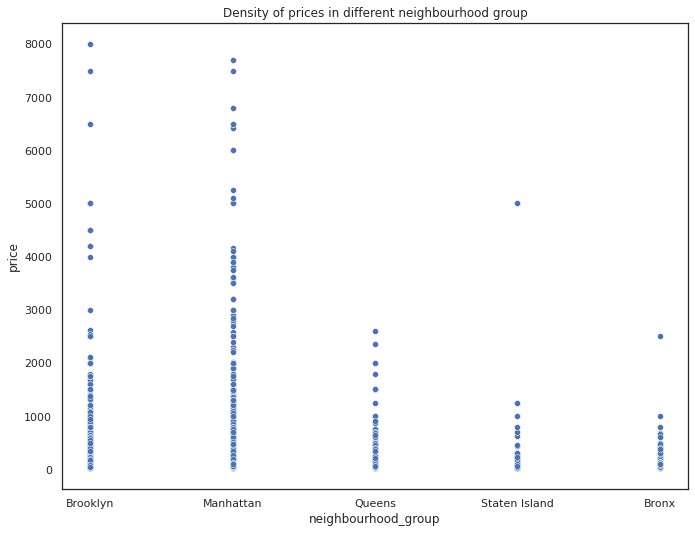

In [35]:
price_distribution = sns.scatterplot(data=new_df1, x='neighbourhood_group', y='price',)
price_distribution.set_title("Density of prices in different neighbourhood group")
plt.show()


## --> So, Brooklyn has the highest density of price distribution while Bronx has the lowest.

# **6) Lets count the different room type**

In [36]:
counting_room_type = new_df1.room_type.value_counts()
print(counting_room_type)


Entire home/apt    25381
Private room       22292
Shared room         1123
Name: room_type, dtype: int64


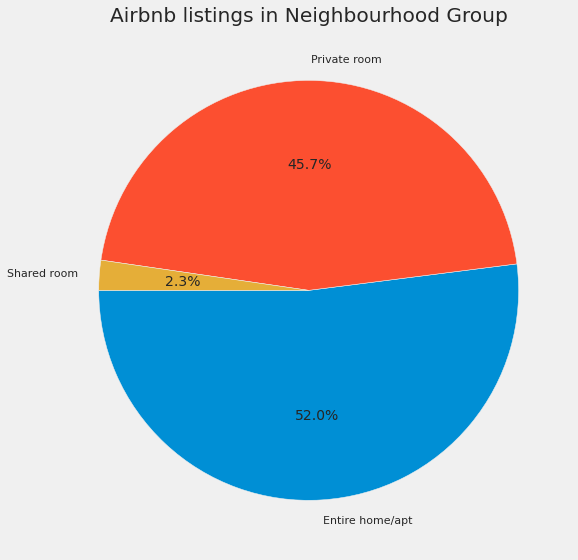

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,9))
plt.title("Airbnb listings in Neighbourhood Group")
g = plt.pie(new_df1.room_type.value_counts(), labels=df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



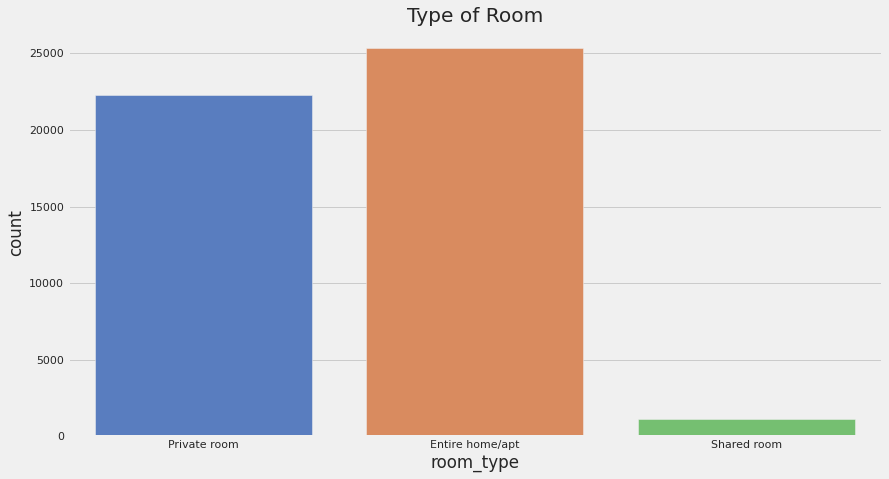

In [38]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(new_df1.room_type, palette="muted")
fig = plt.gcf()
plt.show()

# **7) Count of different room_type in each neighbourhood_group**


###---> Different neighbourhood_group vs room type 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



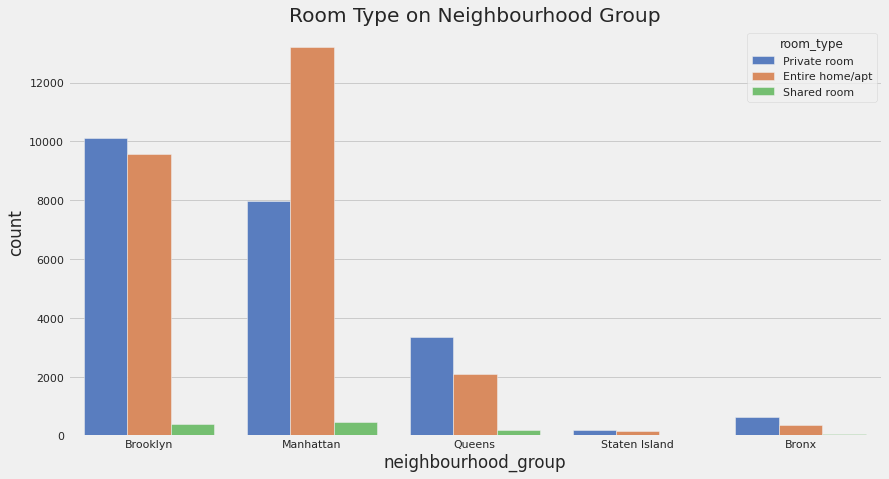

In [39]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

HERE WE CAN SEE, that

1.Brooklyn have the high number of private room spaces

2.Manhattan have the high number entire home/apt. room type

3.Queens have the highest private room spaces which is much lesser than brooklyn and manhattan.

4.Staten island have much less number of room_types. and there is almost negligible shared room type

5.In Bronx, private room is higher than the Entire room/apt. and also there is no shared room type. 


# **8) Average Price of each Room_type**

In [40]:
avgprice_of_room_type = new_df1.groupby('room_type')['price'].mean().reset_index().sort_values('price')
avgprice_of_room_type

,room_type,price
2,Shared room,71.796082
1,Private room,89.000314
0,Entire home/apt,210.081124


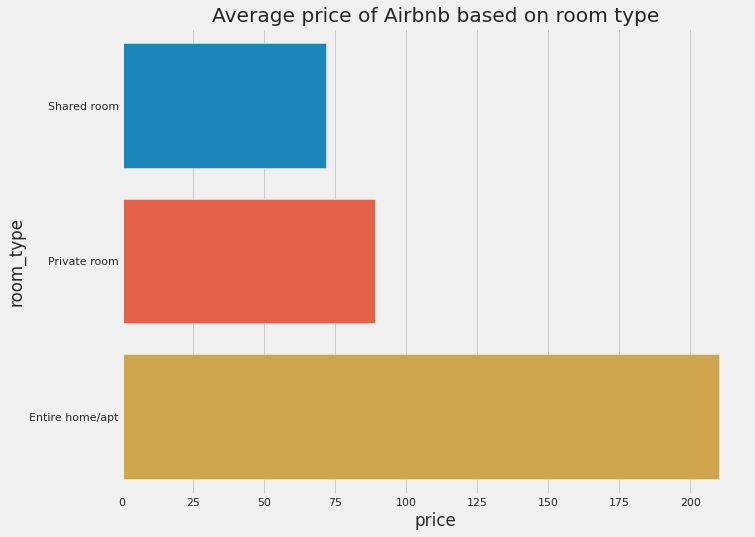

In [41]:
sns.barplot(x='price', y='room_type', data=avgprice_of_room_type)
plt.title('Average price of Airbnb based on room type')
plt.show()



*  # So we can see that the most expensive room type is Entire home/Apt followed by private and share room.
*   # We can easily understand that the price is high for Entire room as it has high space area , and have different facilities provided by host for the convenient of guests
* #  Average Price of Private room is like about 50% cheaper than Entire room






# **9) Price range of each room types in different neighbourhood_group**

In [42]:
room_type_price_of_neigh_grp =  new_df1.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
room_type_price_of_neigh_grp

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.978462,64.222222
Brooklyn,177.422259,76.615940,52.055696
Manhattan,246.544296,115.640035,89.409664
Queens,147.368245,68.849213,70.963351
Staten Island,173.846591,62.518717,69.142857


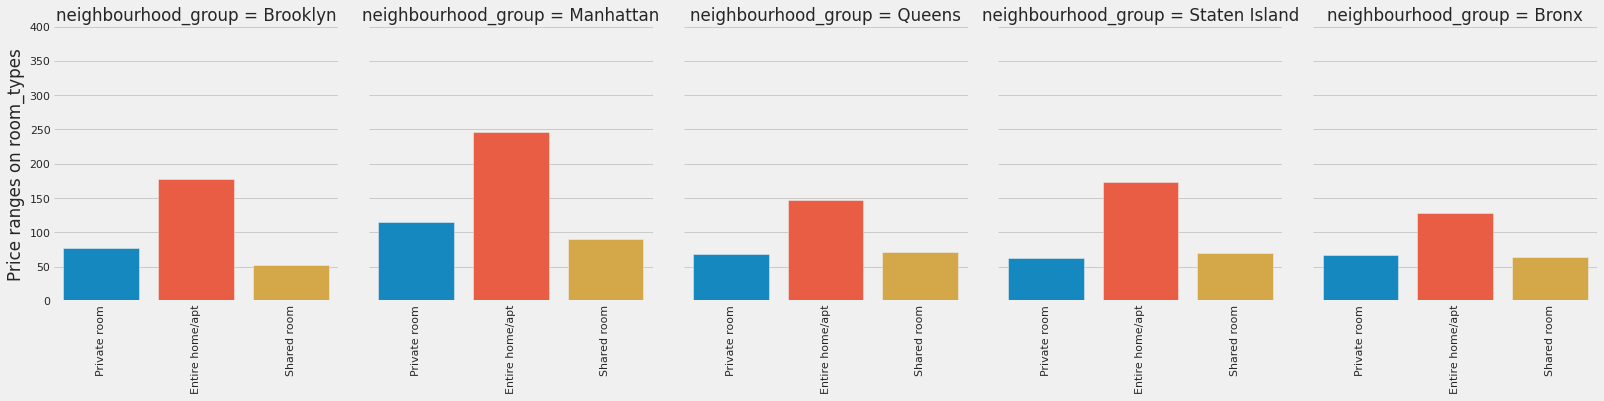

In [43]:
price_range_room_type_in_neigh_grp = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=new_df1, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(price_range_room_type_in_neigh_grp.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

# **10) Minimum nights guests stays at Airbnb** 

In [44]:
min_nights  = new_df1.minimum_nights.value_counts().head(10)
min_nights1 = pd.DataFrame(min_nights)
min_nights1.reset_index(inplace=True)
min_nights1.rename(columns={'index':'min_nights','minimum_nights':'number of property' }, inplace=True)
min_nights1

,min_nights,number of property
0,1,12686
1,2,11684
2,3,7990
3,30,3750
4,4,3300
5,5,3027
6,7,2053
7,6,752
8,14,558
9,10,478


###--> We can see that around 12686 Airbnb listings have minimum_night of 1

# **11) Correlation between the columns**

In [46]:
# removing id and host id from correlation matrix because it will give biased value
gg=new_df1.drop(["id","host_id"],axis=1,inplace=True)
gg

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



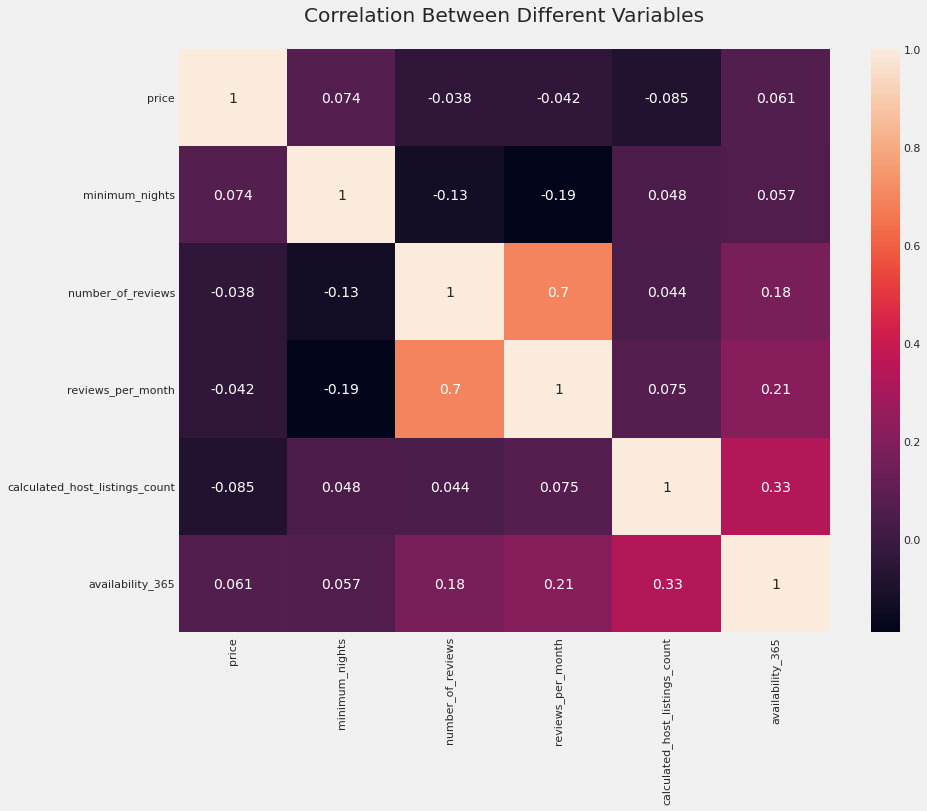

In [47]:
corr = new_df1.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

# **CONCLUSION**



#After exploring and analysing through data and visualization, we obtained some interesting insights into the Airbnb domain....


##**1.** The neighbourhood group **"Manhattan"** has the most expensive bookings compared to the other neighbourhood group. We can  say this based on the neighbourhood vs listings and neighbourhood vs price, the chart and graph cleary shows us that Manhattan has the highest number of Airbnb bookings and expensive because it receives average price of $194.8.!
##**2.** **Manhattan** is also considered as the **best location** based on the graph of neighbourhood group vs number of reviews. Why Manhattan is best, most expensive and most trafficed location? So, we did some research and found out that why Manhattan is the best location, because it is closest to the famous city hotspots like Time Square, Empire Street, Central Park, etc and have very convenient transportation services.

##**3.** **Busiest Host** = Based on the different graphs like neighbourhood vs price, neighbourhood group vs Airbnb listings and neighbourhood group vs number of reviews, **the host(host id = 219517861 and his name = Sonder NYC)** who has 327 listings is considered as the busiest host in NYC and **he belongs to the Manhattan**. We get to understand that Manhattan and brooklyn provides the most houses and rooms. Hence, we can imagine that not only the host who has 327 listings but if we consider the top 10 busy hosts, they all are from the area of Manhatten and Brooklyn.

##**4.** **According to our analysis**, we **noticed** some **difference in traffic** **among different areas. Manhattan**, **Brooklyn** and **some part of Queens** **have the high traffic of airbnb bookings** **because** they got some famous city hotspots for exploring, travelling or for business purposes, and also they have very convenient transportation. Also there could be many reasons such as clean and hygienic houses and rooms, best amenities provided by hosts, and many more...







